In [1]:
'''
## 共享GPU
import tensorflow as tf
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.25)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options)) 
'''

'\n## 共享GPU\nimport tensorflow as tf\ngpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.25)\nsess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options)) \n'

In [2]:
from keras.layers import Activation, Conv2D, BatchNormalization, Dense
from keras.layers import Dropout, Flatten, Input, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras import Model 
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [3]:
# 读取训练集与验证集
IMSIZE = 224
train_generator = ImageDataGenerator(rescale=1./225).flow_from_directory('/mnt/data/data_inception/train',
                                                                        target_size=(IMSIZE,IMSIZE),
                                                                        batch_size=64,
                                                                        class_mode='categorical')

validation_generator = ImageDataGenerator(rescale=1./225).flow_from_directory('/mnt/data/data_inception/train',
                                                                        target_size=(IMSIZE,IMSIZE),
                                                                        batch_size=64,
                                                                        class_mode='categorical')


Found 952 images belonging to 17 classes.
Found 952 images belonging to 17 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 432x288 with 0 Axes>

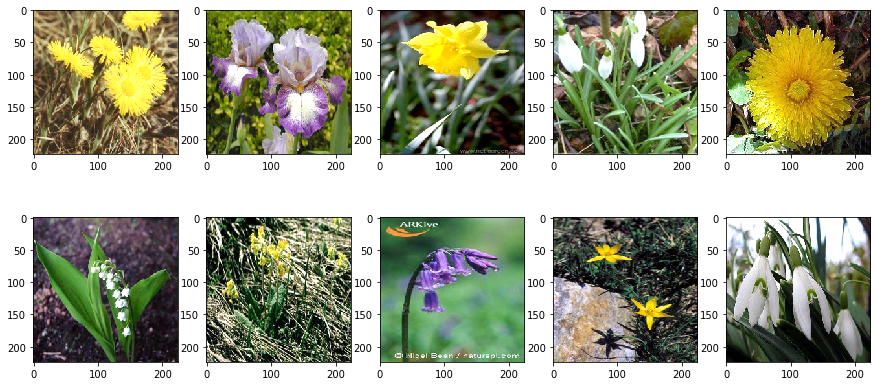

In [4]:
#图片展示
plt.figure()
fig, ax = plt.subplots(2,5)
fig.set_figheight(7)
fig.set_figwidth(15)
ax = ax.flatten()
X, Y = next(validation_generator)
for i in range(10):
    ax[i].imshow(X[i,:,:,:])
plt.show()

In [5]:
#Inception V1代码实现
from keras.layers import Activation, Conv2D, BatchNormalization, Dense
from keras.layers import Dropout, Flatten, Input, MaxPooling2D, concatenate
from keras import Model 

IMSIZE = 224
input_layer=Input([IMSIZE,IMSIZE,3])
x=input_layer

x=Conv2D(64,(7,7),strides=(2,2),padding='same',activation='relu')(x)
x=BatchNormalization(axis=3)(x)
x=MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)

x=Conv2D(192,(3,3),strides=(1,1),padding='same',activation='relu')(x)
x=BatchNormalization(axis=3)(x)
x=MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)

for i in range(9):
    branch1x1=Conv2D(64,(1,1),strides=(1,1),padding='same',activation='relu')(x)
    branch1x1=BatchNormalization(axis=3)(branch1x1)
    branch3x3=Conv2D(96,(1,1),strides=(1,1),padding='same',activation='relu')(x)
    branch3x3=BatchNormalization(axis=3)(branch3x3)
    branch3x3=Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu')(branch3x3)
    branch3x3=BatchNormalization(axis=3)(branch3x3)
    branch5x5=Conv2D(16,(1,1),strides=(1,1),padding='same',activation='relu')(x)
    branch5x5=BatchNormalization(axis=3)(branch5x5)
    branch5x5=Conv2D(32,(5,5),strides=(1,1),padding='same',activation='relu')(branch5x5)
    branch5x5=BatchNormalization(axis=3)(branch5x5)
    branchpool=MaxPooling2D(pool_size=(3,3),strides=(1,1),padding='same')(x)
    branchpool=Conv2D(32,(1,1),strides=(1,1),padding='same',activation='relu')(branchpool)
    branchpool=BatchNormalization(axis=3)(branchpool)
    x=concatenate([branch1x1,branch3x3,branch5x5,branchpool],axis=3)
    x=MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)

x=Dropout(0.4)(x)
x=Flatten()(x)
x=Dense(17,activation='softmax')(x)
output_layer = x
model = Model(input_layer,output_layer)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 112, 112, 64) 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 56, 56, 64)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [6]:
#模型编译与拟合
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model.fit_generator(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
15/15 [==============================] - 43s 3s/step - loss: 3.9664 - accuracy: 0.0557 - val_loss: 2.8404 - val_accuracy: 0.0536
Epoch 2/20
15/15 [==============================] - 8s 521ms/step - loss: 3.4460 - accuracy: 0.1218 - val_loss: 2.8198 - val_accuracy: 0.0756
Epoch 3/20
15/15 [==============================] - 8s 545ms/step - loss: 2.9937 - accuracy: 0.1744 - val_loss: 2.8351 - val_accuracy: 0.0399
Epoch 4/20
15/15 [==============================] - 8s 540ms/step - loss: 2.6781 - accuracy: 0.2321 - val_loss: 2.8033 - val_accuracy: 0.0809
Epoch 5/20
15/15 [==============================] - 8s 529ms/step - loss: 2.2744 - accuracy: 0.2815 - val_loss: 2.8129 - val_accuracy: 0.0588
Epoch 6/20
15/15 [==============================] - 8s 512ms/step - loss: 1.9962 - accuracy: 0.3687 - val_loss: 2.8502 - val_accuracy: 0.0588
Epoch 7/20
15/15 [==============================] - 8s 552ms/step - loss: 1.7625 - accuracy: 0.4527 - val_loss: 2.8646 - val_accuracy: 0.0641
Epoch 8/